# **Project Name**    -   CSAT Score Prediction App



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

## 📊 CSAT Score Prediction Project

This project predicts Customer Satisfaction (CSAT) scores using operational & textual features.
We built multiple ML models (Logistic Regression, Random Forest, Decision Tree, XGBoost) and tuned them to improve performance.
Key highlights:
- Feature engineering from both structured and unstructured data
- Balancing dataset using SMOTE
- Hyperparameter tuning with GridSearchCV
- Explainability using SHAP
- Interactive Streamlit app to test scenarios and visualize feature impacts

✅ Final XGBoost F1-score after tuning: **0.792**

The goal: help identify potential dissatisfaction early, so the business can act proactively.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this project is to **predict customer satisfaction (CSAT) scores** based on a mix of operational and textual features.  
In an e-commerce customer support context, predicting which tickets might result in low CSAT scores enables the business to take **proactive steps**—like quicker escalations, targeted agent training, or compensation—to improve overall customer experience and retention.

To achieve this:
- We combined **structured operational data** (e.g., response delay, order time, agent information) with **text-derived features** like remark length, number of tokens, and **sentiment score**.
- Addressed **class imbalance** (only ~14% low CSAT scores) using **SMOTE**.
- Performed **feature selection** using a RandomForestClassifier to keep only the most impactful features.
- Built multiple ML models (**Logistic Regression, Random Forest, Decision Tree, XGBoost**) and improved them with **GridSearchCV hyperparameter tuning**.
- Added **explainability** with **SHAP**, making model predictions interpretable and transparent.
- Created an interactive **Streamlit web app** where users can:
  - Input new scenarios (including customer remarks)
  - Automatically extract text features (length, tokens, sentiment)
  - See predicted CSAT score and probabilities
  - Explore feature importance & SHAP explanations
  - View actionable insights and recommendations

This end-to-end solution helps stakeholders understand **why** a low CSAT score is predicted and take action to enhance customer satisfaction.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import contractions
import spacy
import shap
import joblib
import json
from textblob import TextBlob
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

c:\Users\himan\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Dataset Loading

In [2]:
# Load Dataset
dataset = pd.read_csv('Customer_support_data.csv')

### Dataset First View

In [3]:
# Dataset First Look
dataset.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01-08-2023 11:13,01-08-2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01-08-2023 12:52,01-08-2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01-08-2023 20:16,01-08-2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01-08-2023 20:56,01-08-2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01-08-2023 10:30,01-08-2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
print(f'Rows: {len(dataset)}\nColumn: {len(dataset.columns)}')

Rows: 85907
Column: 20


### Dataset Information

In this section, we explore data quality by checking duplicate rows and missing/null values. This helps us understand potential data quality issues we need to address before modeling.

In [5]:
# Dataset Info
dataset.shape

(85907, 20)

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicates = dataset.duplicated().sum()
print(f'Number of duplicate Rows: {duplicates}')

Number of duplicate Rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
dtype = dataset.dtypes
missing_count = dataset.isnull().sum()
missing_percentage = (missing_count/len(dataset))*100
missing_df = pd.DataFrame({
    'Missing Count': missing_count, 
    'Missing %': missing_percentage,
    'Datatype': dtype
    })
missing_df = missing_df[missing_df['Missing %']>0].sort_values(by='Missing %', ascending=False)
missing_df

,Missing Count,Missing %,Datatype
connected_handling_time,85665,99.718300,float64
Customer_City,68828,80.119199,object
Product_category,68711,79.983005,object
Item_price,68701,79.971364,float64
order_date_time,68693,79.962052,object
Customer Remarks,57165,66.542889,object
Order_id,18232,21.222950,object


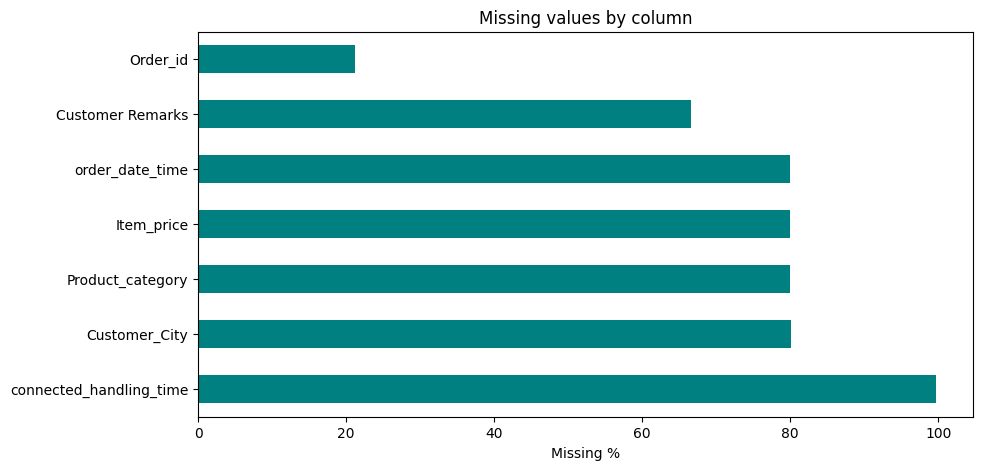

In [8]:
# Visualizing the missing values
# Barplot of missing %
missing_df['Missing %'].plot(kind='barh', figsize=(10,5), color='teal')
plt.xlabel('Missing %')
plt.title('Missing values by column')
plt.show()


### What did you know about your dataset?

The dataset *'Customer_support_data.csv'* contains about **85,907 rows and 20 columns**, including:

- **Ticket & product details:** Unique_id, Product_category, Item_price, Order_id
- **Timeline features:** order_date_time, issue_reported_date_time, issue_responded_date_time, survey_response_date
- **Customer & channel information:** channel_name, Customer_City, category, Sub-category
- **Agent metadata:** Agent_name, Supervisor, Manager, Tenure Bucket, Agent Shift
- **Free-text feedback:** Customer Remarks
- **Target variable:** CSAT Score

The target variable is **CSAT Score**, which we plan to transform into a binary target indicating low customer satisfaction (e.g., Low_CSAT = 1 if CSAT ≤ 2, else 0).

I also noticed major missing values in fields like `Customer Remarks` and `Order_id`, which might require special handling (such as adding missing flags or imputation).

The dataset includes a mix of categorical variables (e.g., channel_name, category, Agent Shift), numerical variables (Item_price, connected_handling_time), and date/time fields.  
Overall, it captures real customer support interactions and offers useful signals to predict and explain customer satisfaction.


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
dataset.columns.tolist()

['Unique id',
 'channel_name',
 'category',
 'Sub-category',
 'Customer Remarks',
 'Order_id',
 'order_date_time',
 'Issue_reported at',
 'issue_responded',
 'Survey_response_Date',
 'Customer_City',
 'Product_category',
 'Item_price',
 'connected_handling_time',
 'Agent_name',
 'Supervisor',
 'Manager',
 'Tenure Bucket',
 'Agent Shift',
 'CSAT Score']

In [10]:
# Dataset Describe
dataset.describe

<bound method NDFrame.describe of                                   Unique id channel_name         category  \
0      7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1      b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2      200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3      eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4      ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   
...                                     ...          ...              ...   
85902  505ea5e7-c475-4fac-ac36-1d19a4cb610f      Inbound   Refund Related   
85903  44b38d3f-1523-4182-aba2-72917586647c      Inbound    Order Related   
85904  723bce2c-496c-4aa8-a64b-ca17004528f0      Inbound    Order Related   
85905  707528ee-6873-4192-bfa9-a491f1c08ab5      Inbound         Feedback   
85906  07c7a878-0d5a-42e0-97ef-de59abec0238      Inbound          Returns   

                       Sub-category      

### Variables Description

Our dataset includes a mix of categorical, numerical, datetime, text, and identifier columns:

- **Categorical variables:**  
  `channel_name`, `category`, `Sub-category`, `Product_category`, `Customer_City`, `Agent_name`, `Supervisor`, `Manager`, `Tenure Bucket`, `Agent Shift`  
  → These will likely need encoding (e.g., one-hot or ordinal) for modeling.

- **Numerical variables:**  
  `Item_price`, `connected_handling_time`  
  → These may require scaling or transformation (e.g., log scale, bucketing).

- **Datetime variables:**  
  `order_date_time`, `issue_reported_at`, `issue_responded`, `survey_response_date`  
  → Useful for extracting features like delay time, weekday, hour, month.

- **Free-text variable:**  
  `Customer Remarks`  
  → Mostly missing; may use missingness as a flag.

- **Identifier / ID columns:**  
  `Unique id`, `Order_id`  
  → Typically dropped for modeling, but can help check duplicates or join data.

- **Target variable:**  
  `CSAT Score`  
  → We will transform this into a binary target (e.g., `Low_CSAT` = 1 if CSAT ≤ 2, else 0).

This breakdown helps us plan data cleaning, feature engineering, and encoding strategies later in the pipeline.


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
unique_counts = dataset.nunique().sort_values(ascending=False)
print(unique_counts)

Unique id                  85907
Order_id                   67675
Issue_reported at          30923
issue_responded            30262
Customer Remarks           18231
order_date_time            13766
Item_price                  2789
Customer_City               1782
Agent_name                  1371
connected_handling_time      211
Sub-category                  57
Supervisor                    40
Survey_response_Date          31
category                      12
Product_category               9
Manager                        6
Agent Shift                    5
Tenure Bucket                  5
CSAT Score                     5
channel_name                   3
dtype: int64


## ***3.Data Wrangling***

### Data Wrangling Code

In [12]:
# Remove duplicate rows
num_duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
if num_duplicates > 0:
    dataset.drop_duplicates(inplace=True)
    print(f"Duplicates removed. New shape: {dataset.shape}")


# Fix column names
dataset.columns = dataset.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
print("\nFixed column names:")
print(dataset.columns.tolist())


# Convert date columns 
date_columns = ['order_date_time', 'issue_reported_at', 'issue_responded', 'survey_response_date']
for col in date_columns:
    dataset[col] = pd.to_datetime(dataset[col], dayfirst=True, errors='coerce')
print("\nConverted date columns to datetime:")
print(dataset[date_columns].dtypes)



# Create helper feature: response delay
dataset['response_delay_minutes'] = (
    (dataset['issue_responded'] - dataset['issue_reported_at']).dt.total_seconds() / 60
)


# Create day of week
dataset['order_dayofweek'] = dataset['order_date_time'].dt.dayofweek
print("\nAdded helper columns: 'response_delay_minutes' and 'order_dayofweek'")


# Drop columns
columns_to_drop = ['supervisor', 'manager', 'unique_id']
dataset.drop(columns=columns_to_drop, inplace=True, errors='ignore')
print(f"\nDropped columns: {columns_to_drop}")
print(f"Current shape: {dataset.shape}")


# Identify high missingness columns
missing_percent = dataset.isnull().mean() * 100
high_missing = missing_percent[missing_percent > 50].sort_values(ascending=False)
print("\nColumns with >50% missing values:")
print(high_missing)


# Reset index
dataset.reset_index(drop=True, inplace=True)
print("\nFinal dataset shape after wrangling:", dataset.shape)


Number of duplicate rows: 0

Fixed column names:
['unique_id', 'channel_name', 'category', 'sub_category', 'customer_remarks', 'order_id', 'order_date_time', 'issue_reported_at', 'issue_responded', 'survey_response_date', 'customer_city', 'product_category', 'item_price', 'connected_handling_time', 'agent_name', 'supervisor', 'manager', 'tenure_bucket', 'agent_shift', 'csat_score']

Converted date columns to datetime:
order_date_time         datetime64[ns]
issue_reported_at       datetime64[ns]
issue_responded         datetime64[ns]
survey_response_date    datetime64[ns]
dtype: object

Added helper columns: 'response_delay_minutes' and 'order_dayofweek'

Dropped columns: ['supervisor', 'manager', 'unique_id']
Current shape: (85907, 19)

Columns with >50% missing values:
connected_handling_time    99.718300
customer_city              80.119199
product_category           79.983005
item_price                 79.971364
order_date_time            79.962052
order_dayofweek            79.9620

C:\Users\himan\AppData\Local\Temp\ipykernel_20132\1006387536.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset[col] = pd.to_datetime(dataset[col], dayfirst=True, errors='coerce')


### What all manipulations have you done and insights you found?

- **Removed duplicate data:**  
  Checked for duplicate rows; dataset was already clean with `0` duplicates.

- **Fixed column names:**  
  Standardized column names by stripping whitespaces, converting to lowercase, and replacing spaces and `-` with `_`.

  Result: cleaner column names like `sub_category` instead of `Sub-category`.

- **Converted date columns to datetime type:**  
  Parsed date fields (`order_date_time`, `issue_reported_at`, `issue_responded`, `survey_response_date`) using `dayfirst=True` to match data format.  

  Enables date-based analysis and feature creation.

- **Created new helper columns:**  
  - `response_delay_minutes`: Time difference (in minutes) between issue being reported and responded.  
  - `order_dayofweek`: Extracted day of the week from `order_date_time`.

- **Dropped irrelevant columns:**  
  Removed `supervisor`, `manager`, and `unique_id` because they are high-cardinality identifiers with limited predictive value.

- **Identified columns with high missingness (>50%):**  
  Found that columns like `connected_handling_time`, `customer_city`, `product_category`, and some date-based columns have significant missing data.  
  
  These columns will need careful handling later in **Feature Engineering & Data Preprocessing**.

**Overall:** After these structural cleaning and helper feature additions, the dataset is now ready for detailed exploratory data analysis (EDA) to discover further patterns and insights.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Graphs**

#### Chart - 1

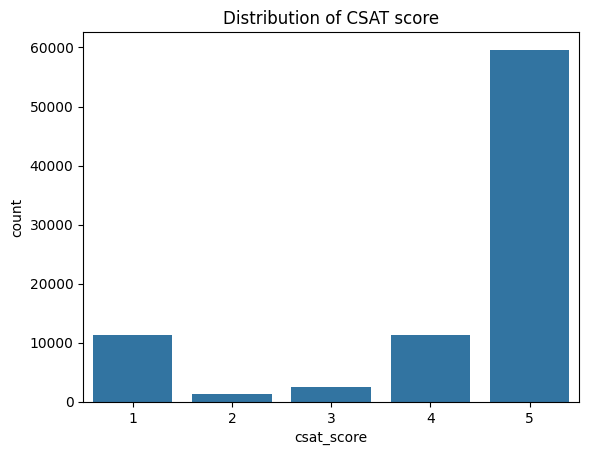

In [13]:
# Chart - 1 visualization code
sns.countplot(x='csat_score',data=dataset)
plt.title('Distribution of CSAT score')
plt.show()

##### 1. Why did you pick the specific chart?

To see how balanced or imbalanced the target variable `csat_score` is across its possible scores.

##### 2. What is/are the insight(s) found from the chart?

The distribution is clearly skewed: score 5 dominates the dataset, while very few tickets have scores 2 or 3. This shows a strong class imbalance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.Getting to know the imbalance in the target variable is critical: it means our model must handle it (eg: with resampling or adjusted metrics), otherwise it could fail to predict low CSAT tickets which are the most important from a business perspective.

#### Chart - 2

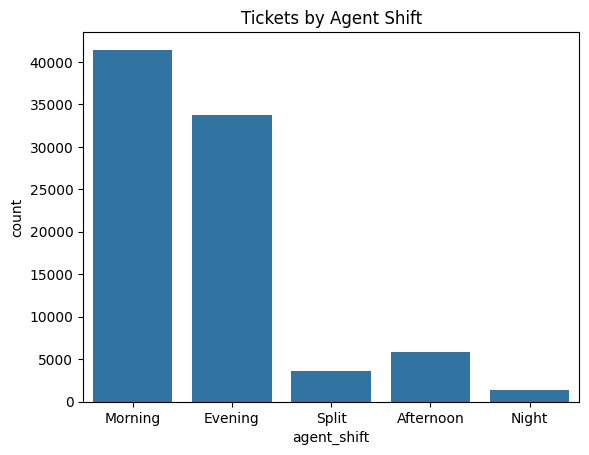

In [14]:
# Chart - 2 visualization code
sns.countplot(x='agent_shift', data=dataset)
plt.title('Tickets by Agent Shift')
plt.show()

##### 1. Why did you pick the specific chart?

To understand which shifts handle the most tickets.

##### 2. What is/are the insight(s) found from the chart?

Morning and Evening shifts handle most of the tickets

Night and Split shift handles very few tickets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. 

Since most tickets comes during Morning or Evening, managers can prioritize staff and quality improvement there. 

Night shift could still matter if it has disproportionately low CSAT.

#### Chart - 3

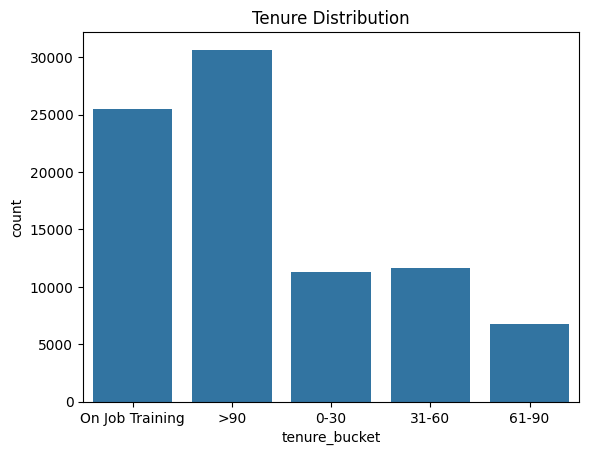

In [15]:
# Chart - 3 visualization code
sns.countplot(x='tenure_bucket', data=dataset)
plt.title('Tenure Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

To see how experienced our agents are; tenure can impact performance.

##### 2. What is/are the insight(s) found from the chart?

Many agents are either in "On Job Training" or ">90 days" buckets; 61-90 tenure has the least agents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Helps managers spot whether newer or very experienced agents dominate the data, which can affect training strategies and explain CSAT trends.

#### Chart - 4

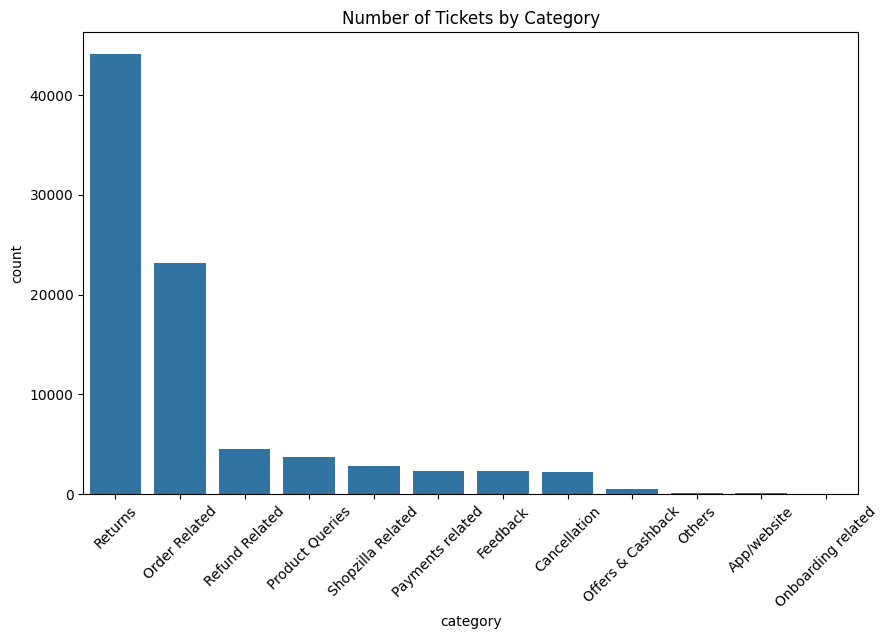

In [16]:
# Chart - 4 visualization code
plt.figure(figsize=(10,6))
sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Tickets by Category')
plt.show()

##### 1. Why did you pick the specific chart?

To identify which support categories have the highest ticket volumes.

##### 2. What is/are the insight(s) found from the chart?

"Returns" and "Order Related" issues have far more tickets than others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These categories could be major contributors to dissatisfaction; managers might focus improvements here for largest impact.

#### Chart - 5

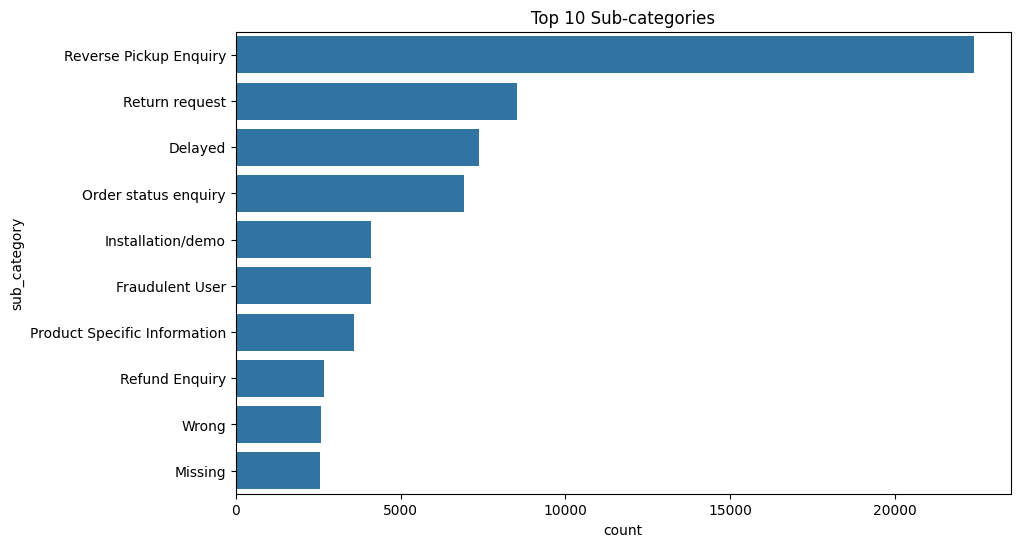

In [17]:
# Chart - 5 visualization code
top_subcats = dataset['sub_category'].value_counts().nlargest(10).index
top_subcats_dataset = dataset[dataset['sub_category'].isin(top_subcats)]
plt.figure(figsize=(10,6))
sns.countplot(y='sub_category', data=top_subcats_dataset,order=top_subcats)
plt.title('Top 10 Sub-categories')
plt.show()


##### 1. Why did you pick the specific chart?

`sub_category` has too many unique values; showing top 10 makes the analysis clearer.

##### 2. What is/are the insight(s) found from the chart?

"Reverse Pickup Enquiry" dominates with high volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Focusing quality and speed improvements on these top issue types could prevent many low CSAT cases.

#### Chart - 6

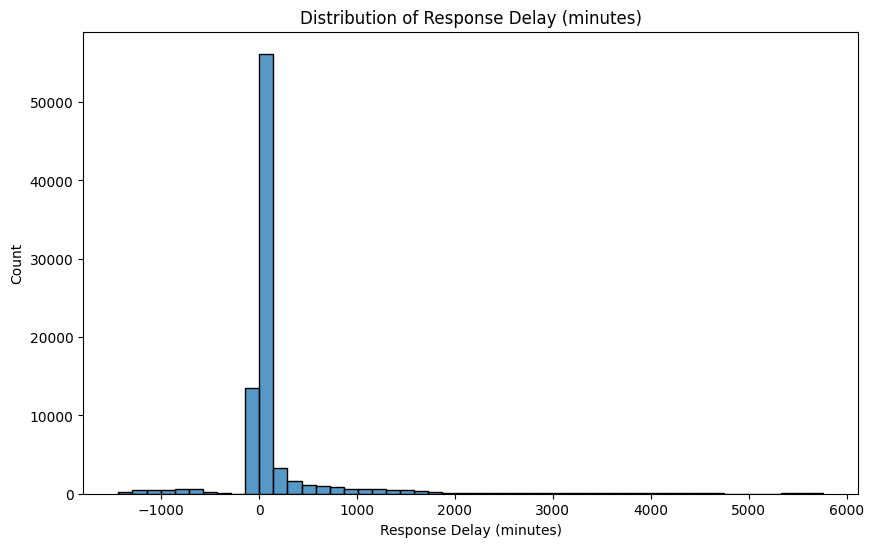

In [18]:
# Chart - 6 visualization code
plt.figure(figsize=(10,6))
sns.histplot(dataset['response_delay_minutes'].dropna(), bins=50)
plt.title('Distribution of Response Delay (minutes)')
plt.xlabel('Response Delay (minutes)')
plt.show()

##### 1. Why did you pick the specific chart?

To check for skewness and extreme delays in response times.

##### 2. What is/are the insight(s) found from the chart?

The distribution is highly skewed with a long tail: most tickets have short delays, but a few have very large (even negative) delays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Outlier tickets with huge delays likely drive low CSAT; business can investigate and fix root causes

#### Chart - 7

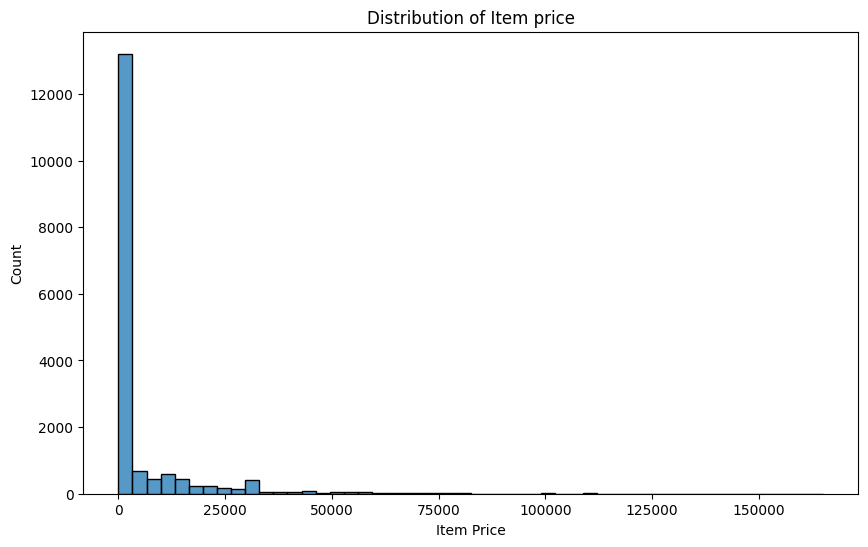

In [19]:
# Chart - 7 visualization code
plt.figure(figsize=(10,6))
sns.histplot(dataset['item_price'].dropna(), bins=50)
plt.title('Distribution of Item price')
plt.xlabel('Item Price')
plt.show()

##### 1. Why did you pick the specific chart?

To see the spread of product prices in customer issues.

##### 2. What is/are the insight(s) found from the chart?

Strong right skew: most items are low-priced; a few are very expensive.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. High-priced items, even if fewer, might have larger business impact if they lead to low CSAT, so these tickets could be prioritized.

### **Bivariate Graphs**

#### Chart - 8

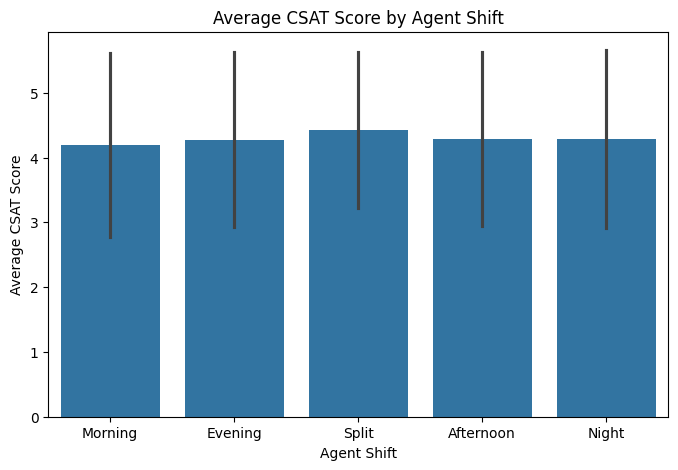

In [20]:
# Chart - 8 visualization code
plt.figure(figsize=(8,5))
sns.barplot(x='agent_shift', y='csat_score', data=dataset, estimator=np.mean, errorbar='sd')
plt.title("Average CSAT Score by Agent Shift")
plt.xlabel("Agent Shift")
plt.ylabel("Average CSAT Score")
plt.show()


##### 1. Why did you pick the specific chart?

To analyze how the shift timing of agents impacts customer satisfaction. Time-of-day patterns often affect service levels due to fatigue, staffing, or volume.

##### 2. What is/are the insight(s) found from the chart?

All shifts show similar average CSAT scores, but "Split" shift seems slightly better. Standard deviations are high, suggesting inconsistent performance within shifts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since performance is fairly uniform across shifts, shift allocation can focus more on volume handling than performance concerns.

#### Chart - 9

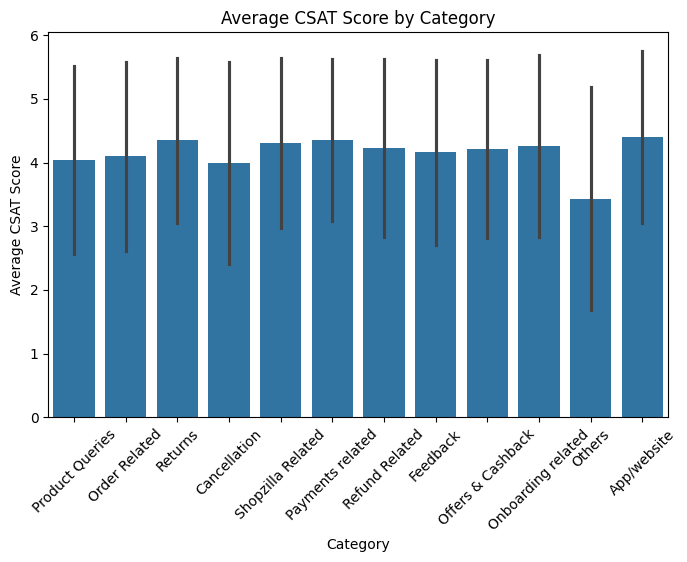

In [21]:
# Chart - 9 visualization code
plt.figure(figsize=(8,5))
sns.barplot(x='category', y='csat_score', data=dataset, estimator=np.mean, errorbar='sd')
plt.xticks(rotation=45)
plt.title("Average CSAT Score by Category")
plt.xlabel("Category")
plt.ylabel("Average CSAT Score")
plt.show()

##### 1. Why did you pick the specific chart?

Helps pinpoint which customer service categories (like Returns, Refunds, Feedback, etc.) are performing well or poorly in terms of customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Most categories hover around the same CSAT (4.0–4.5), except “Others” which is significantly lower (~3.5). This may indicate unresolved or misclassified issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Low CSAT in Others implies poor issue classification or unresolved problems — fixing this can uplift CSAT scores across the board.

#### Chart - 10

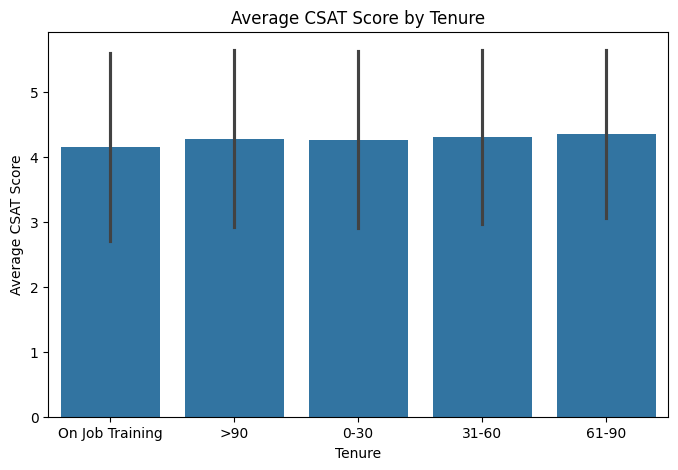

In [22]:
# Chart - 10 visualization code
plt.figure(figsize=(8,5))
sns.barplot(x='tenure_bucket', y='csat_score', data=dataset, estimator=np.mean, errorbar='sd')
plt.title("Average CSAT Score by Tenure")
plt.xlabel("Tenure")
plt.ylabel("Average CSAT Score")
plt.show()

##### 1. Why did you pick the specific chart?

Selected to understand if the experience level of agents (measured in tenure) correlates with higher CSAT scores. This can inform hiring, training, and retention strategies.

##### 2. What is/are the insight(s) found from the chart?

CSAT scores slightly increase with tenure, peaking at 61–90 days. This suggests agents become better with time, but the gains are marginal. On-job trainees aren't far behind, which is positive.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since tenure shows a small CSAT increase, investing in early coaching for new agents can yield quicker improvements.

#### Chart - 11

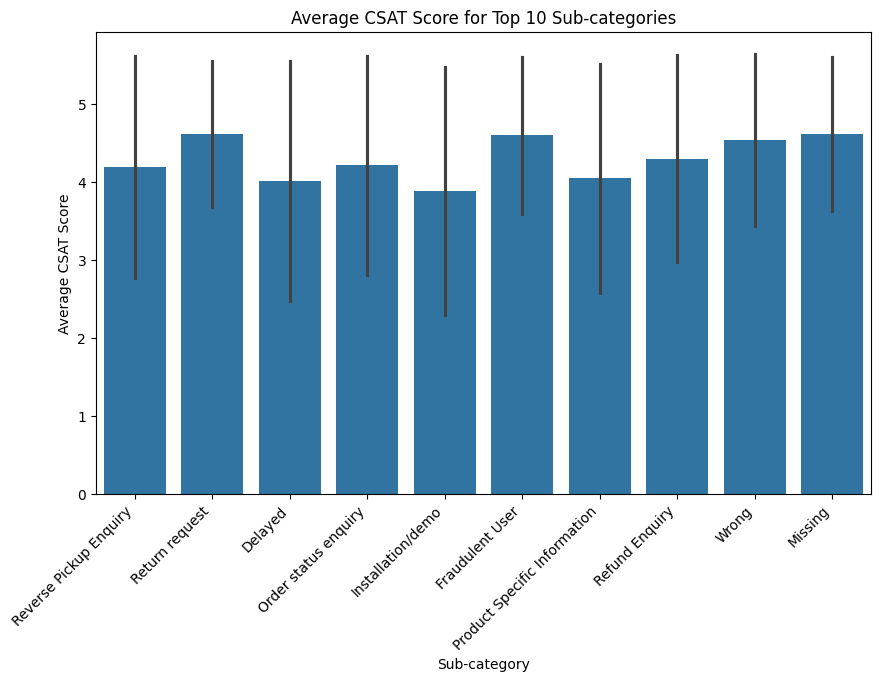

In [23]:
# Chart - 11 visualization code
plt.figure(figsize=(10,6))
sns.barplot(x='sub_category',y='csat_score',data=top_subcats_dataset,estimator=np.mean,errorbar='sd',order=top_subcats)
plt.title('Average CSAT Score for Top 10 Sub-categories')
plt.xlabel('Sub-category')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 1. Why did you pick the specific chart?

It shows which specific issues are doing well or causing problems within each category.

##### 2. What is/are the insight(s) found from the chart?

Sub-categories like “Delayed,” “Fraudulent User,” and “Order Status Enquiry” have lower CSAT (~3.9–4.0), while others like “Return request” and “Missing” are higher (~4.5–4.6). This gives precise focus areas for improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Now we know exactly which types of issues need better handling — focusing on improving communication or resolution in low-scoring areas can directly boost CSAT.

### **Multivariate Graph**

#### Chart - 12

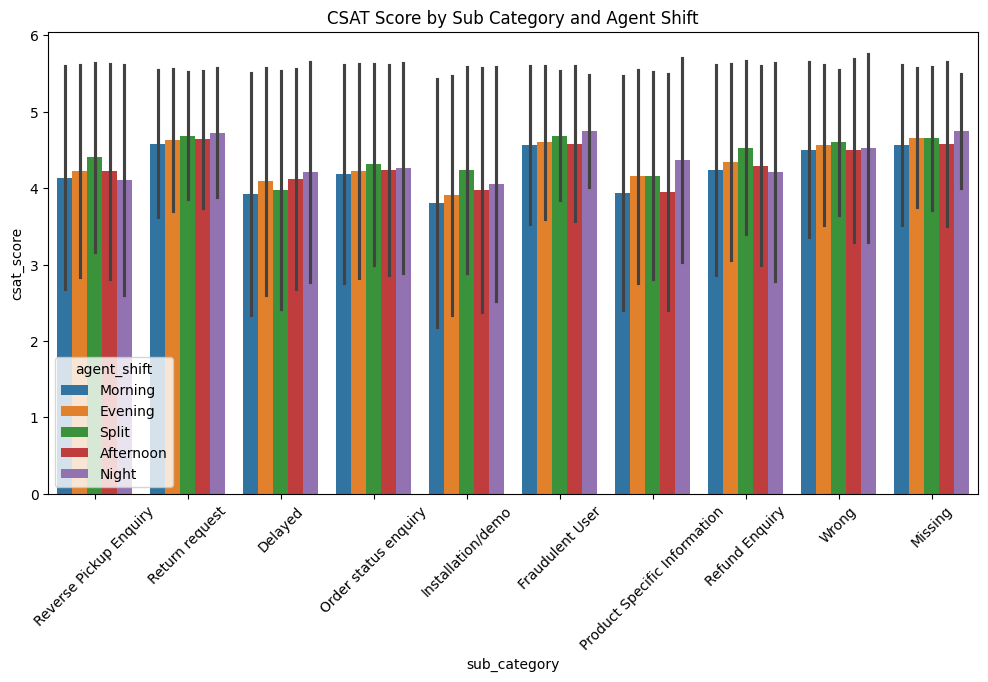

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x='sub_category', y='csat_score', hue='agent_shift',estimator=np.mean,errorbar='sd', data=top_subcats_dataset, order=top_subcats)
plt.title("CSAT Score by Sub Category and Agent Shift")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

It clearly shows **where(which sub-category) and when(agent_shift)** CSAT drops most - which directly supports our project goal, explaining the risk and enabling proactive action.

##### 2. What is/are the insight(s) found from the chart?

“Return request”, “Missing” tend to show higher CSAT scores, particularly during Split and Night shifts.

“Delayed” and “Order Status Enquiry” stand out with lower CSAT scores across all shifts, signaling customer dissatisfaction with delays and lack of order clarity.

“Fraudulent User” sub-category actually performs reasonably well, with CSAT scores clustering around the mid-to-high range.

Split shift agents generally maintain slightly higher CSAT scores across several sub-categories, suggesting they may handle a broader or more balanced workload well.

Answer Here.

## ***5. Feature Engineering & Data Pre-processing***

### 1.Removing Irrelevant Columns

In [ ]:
cols_to_drop = [
    "unique_id", "order_id", "supervisor", "manager",
    "connected_handling_time", "customer_city",
    "product_category", "item_price", 'sub_category'
]
dataset.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Print remaining columns
print("Columns retained for modeling and dashboard explanation:")
print(dataset.columns.tolist())

# 📊 Show missing value counts
missing_counts = dataset.isnull().sum()
print("\nMissing values in retained columns:")
print(missing_counts[missing_counts > 0].sort_values(ascending=False))


✅ Columns retained for modeling and dashboard explanation:
['channel_name', 'category', 'customer_remarks', 'order_date_time', 'issue_reported_at', 'issue_responded', 'survey_response_date', 'agent_name', 'tenure_bucket', 'agent_shift', 'csat_score', 'response_delay_minutes', 'order_dayofweek']

Missing values in retained columns:
order_date_time     68693
order_dayofweek     68693
customer_remarks    57165
dtype: int64


In [29]:
dataset.head()

,channel_name,category,customer_remarks,order_date_time,issue_reported_at,issue_responded,survey_response_date,agent_name,tenure_bucket,agent_shift,csat_score,response_delay_minutes,order_dayofweek
0,Outcall,Product Queries,NaN,NaT,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,Richard Buchanan,On Job Training,Morning,5,34.0,NaN
1,Outcall,Product Queries,NaN,NaT,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,Vicki Collins,>90,Morning,5,2.0,NaN
2,Inbound,Order Related,NaN,NaT,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,Duane Norman,On Job Training,Evening,5,22.0,NaN
3,Inbound,Returns,NaN,NaT,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,Patrick Flores,>90,Evening,5,20.0,NaN
4,Inbound,Cancellation,NaN,NaT,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,Christopher Sanchez,0-30,Morning,5,2.0,NaN


### 2. Handling Missing Values

Keeping `order_date_time` and `order_dayofweek` without imputing any values as it may affect models performance

Imputed `customer_remarks` with "No Comments" instead of dropping it

In [30]:
dataset['customer_remarks'] = dataset['customer_remarks'].fillna("No Comments")

# Check remaining missing values
missing_counts = dataset.isnull().sum()
print(missing_counts[missing_counts > 0])

order_date_time    68693
order_dayofweek    68693
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

`customer_remarks`-> Filled with "No comment", This is a text field. When customers don’t leave a remark, "No comment" is a natural, non-misleading placeholder. It avoids breaking NLP pipelines and preserves the row.

`order_date_time`-> No imputation (left as NaT), We did not impute this because inventing timestamps would introduce artificial patterns and mislead the model. It’s better to leave as missing or use only when available.

`order_dayofweek`-> No imputation (left as NaN), This is derived from `order_date_time`. Missing values here simply reflect missing order_date_time.

Tree-based models like XGBoost will handle missing values directly without needing imputation for numeric or datetime-derived columns.

### 3. Handling Order Date Time Missing Values and Extracting new features

- Created a binary flag `order_date_time_missing` to indicate which rows had missing dates.
- Imputed missing `order_date_time` values with a placeholder date (`1900-01-01`) to clearly mark missing entries.
- Extracted useful datetime features: day of week, month, and hour.
- Converted the datetime column to a numeric timestamp (nanoseconds since Unix epoch) suitable for machine learning models like XGBoost.

In [31]:
# Create a missing indicator for 'order_date_time'
# A new column where rows with missing value gets 1 and others get 0
dataset['order_date_time_missing'] = dataset['order_date_time'].isnull().astype(int)  


# Impute missing 'order_date_time' with a placeholder datetime
placeholder_date = pd.Timestamp('1900-01-01')
dataset['order_date_time'] = dataset['order_date_time'].fillna(placeholder_date)


# Convert the datetime column to numeric timestamp (int64)
# This converts to nanoseconds since epoch, suitable for XGBoost input
dataset['order_date_time_ts'] = dataset['order_date_time'].astype('int64')


# Extract useful datetime features for the model
dataset['order_dayofweek'] = dataset['order_date_time'].dt.dayofweek  # Monday=0, Sunday=6
dataset['order_month'] = dataset['order_date_time'].dt.month          # Month number 1-12
dataset['order_hour'] = dataset['order_date_time'].dt.hour            # Hour of day 0-23


# Check how many missing values remain after this
print("Missing values after datetime imputation:")
print(dataset[['order_date_time', 'order_date_time_missing']].isnull().sum())


Missing values after datetime imputation:
order_date_time            0
order_date_time_missing    0
dtype: int64


### 4. Checking for Outliers

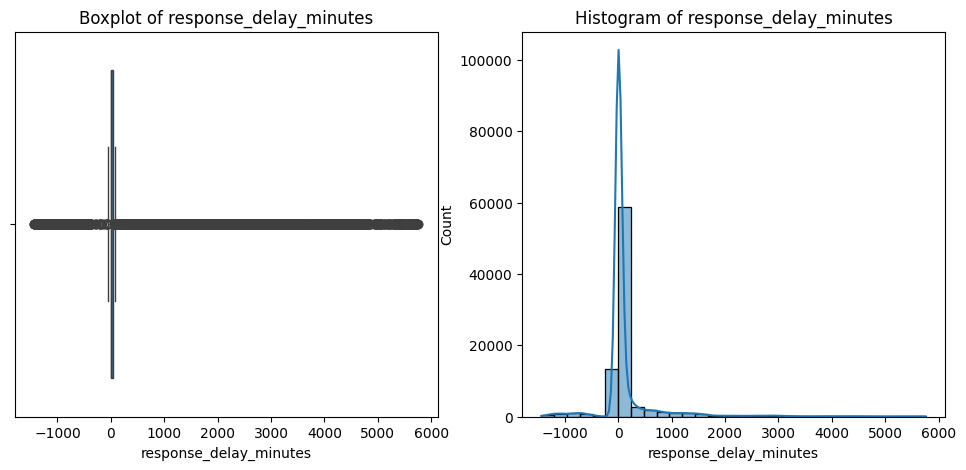

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['response_delay_minutes']

for col in columns_to_check:
    plt.figure(figsize=(12,5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(dataset[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.show()


### 5. Handling Outliers

Outliers are extreme values that can distort model training, reduce accuracy, and mislead insights.
In this dataset, for example, response delays over several thousand minutes or negative delays can bias the model.

**Benefits of handling outliers:**
- Improves model stability and accuracy by focusing on typical cases rather than rare extremes.
- Helps the model generalize better to unseen data.
- Makes data visualizations and feature importance clearer and more interpretable.
- Corrects data entry or timestamp errors (e.g., negative delays).

In [33]:
# Handling Outliers & Outlier treatments
# Fix negative delays by setting them to zero
dataset['response_delay_minutes'] = dataset['response_delay_minutes'].apply(lambda x: max(x, 0))

# Calculate IQR
Q1 = dataset['response_delay_minutes'].quantile(0.25)
Q3 = dataset['response_delay_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define upper bound for capping
upper_bound = Q3 + 1.5 * IQR

# Cap values at upper bound
dataset['response_delay_minutes'] = dataset['response_delay_minutes'].apply(lambda x: min(x, upper_bound))
dataset['response_delay_minutes']

0        34.0
1         2.0
2        22.0
3        20.0
4         2.0
         ... 
85902    84.5
85903     2.0
85904     5.0
85905     1.0
85906     1.0
Name: response_delay_minutes, Length: 85907, dtype: float64

##### What all outlier treatment techniques have you used and why did you use those techniques?

In this step, we:
- Fix negative delays by setting them to zero (since a negative delay isn't logically possible).
- Cap excessively high delays using the IQR method, so they don't dominate model training.
- IQR method is used because the graph of `response_delay_minutes` shows it is skewed, and IQR works well for skewed distributions.

### 6. Categorical Encoding

In [34]:
one_hot_cols = [
    'channel_name', 'category', 'agent_shift', 'tenure_bucket'
]
dataset = pd.get_dummies(dataset, columns=one_hot_cols,drop_first=True)

agent_freq = dataset['agent_name'].value_counts().to_dict()
dataset['agent_name_encoded'] = dataset['agent_name'].map(agent_freq)


dataset.head()

,customer_remarks,order_date_time,issue_reported_at,issue_responded,survey_response_date,agent_name,csat_score,response_delay_minutes,order_dayofweek,order_date_time_missing,...,category_Shopzilla Related,agent_shift_Evening,agent_shift_Morning,agent_shift_Night,agent_shift_Split,tenure_bucket_31-60,tenure_bucket_61-90,tenure_bucket_>90,tenure_bucket_On Job Training,agent_name_encoded
0,No Comments,1900-01-01,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,Richard Buchanan,5,34.0,0,1,...,False,False,True,False,False,False,False,False,True,42
1,No Comments,1900-01-01,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,Vicki Collins,5,2.0,0,1,...,False,False,True,False,False,False,False,True,False,32
2,No Comments,1900-01-01,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,Duane Norman,5,22.0,0,1,...,False,True,False,False,False,False,False,False,True,35
3,No Comments,1900-01-01,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,Patrick Flores,5,20.0,0,1,...,False,True,False,False,False,False,False,True,False,48
4,No Comments,1900-01-01,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,Christopher Sanchez,5,2.0,0,1,...,False,False,True,False,False,False,False,False,False,124


#### What all categorical encoding techniques have you used & why did you use those techniques?

To make categorical variables usable in machine learning models, we transformed them into numerical features:

- Applied **One-Hot Encoding** to low-cardinality categorical columns:  
  `channel_name`, `category`, `agent_shift`, `tenure_bucket`  
  This creates separate binary columns for each category.

- Applied **Frequency Encoding** to `agent_name` (a high-cardinality column):  
  Replaced each agent's name with the count of how many times they appear in the dataset.  
  This keeps the data compact and helps capture the overall exposure of each agent.

These transformations help the model understand categorical data without adding too many sparse features.

### 7. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [35]:
# Expand Contraction
def expand(text):
    return contractions.fix(text)

dataset['customer_remarks'] = dataset['customer_remarks'].apply(expand)
dataset.head()

,customer_remarks,order_date_time,issue_reported_at,issue_responded,survey_response_date,agent_name,csat_score,response_delay_minutes,order_dayofweek,order_date_time_missing,...,category_Shopzilla Related,agent_shift_Evening,agent_shift_Morning,agent_shift_Night,agent_shift_Split,tenure_bucket_31-60,tenure_bucket_61-90,tenure_bucket_>90,tenure_bucket_On Job Training,agent_name_encoded
0,No Comments,1900-01-01,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,Richard Buchanan,5,34.0,0,1,...,False,False,True,False,False,False,False,False,True,42
1,No Comments,1900-01-01,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,Vicki Collins,5,2.0,0,1,...,False,False,True,False,False,False,False,True,False,32
2,No Comments,1900-01-01,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,Duane Norman,5,22.0,0,1,...,False,True,False,False,False,False,False,False,True,35
3,No Comments,1900-01-01,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,Patrick Flores,5,20.0,0,1,...,False,True,False,False,False,False,False,True,False,48
4,No Comments,1900-01-01,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,Christopher Sanchez,5,2.0,0,1,...,False,False,True,False,False,False,False,False,False,124


#### 2. Lower Casing

In [36]:
# Lower Casing
def lowercase(text):
    return text.lower()

dataset['customer_remarks'] = dataset['customer_remarks'].apply(lowercase)

#### 3. Removing Punctuations

In [37]:
# Remove Punctuations
exclude = string.punctuation
def remove_punctuation(text):
    for word in exclude:
        text = text.replace(word, ' ')
    return text

dataset['customer_remarks'] = dataset['customer_remarks'].apply(remove_punctuation)

#### 4. Removing URLs & Removing words and digits contain digits.

In [38]:
# Remove URLs & Remove words and digits contain digits
def remove_urls_and_digits(text):
    text = re.sub(r'https\S+|http\S+|www\S+', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

dataset['customer_remarks'] = dataset['customer_remarks'].apply(remove_urls_and_digits)

#### 5. Removing StopWords, Tokenization, Normalization and POS Tagging

In [ ]:
nlp = spacy.load('en_core_web_sm')

def preprocess_text_spacy(text):
    doc = nlp(text.strip())
    
    tokens = []
    pos_tags = []
    
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space:
            lemma = token.lemma_
            tokens.append(lemma)
            pos_tags.append((lemma, token.pos_))
    
    return tokens, pos_tags

# Apply to your dataset
dataset[['customer_remarks_tokens', 'customer_remarks_pos']] = dataset['customer_remarks'].fillna('').apply(
    lambda x: pd.Series(preprocess_text_spacy(x))
)

# Check result
print(dataset[['customer_remarks_tokens', 'customer_remarks_pos']].head())

  customer_remarks_tokens customer_remarks_pos
0               [comment]    [(comment, NOUN)]
1               [comment]    [(comment, NOUN)]
2               [comment]    [(comment, NOUN)]
3               [comment]    [(comment, NOUN)]
4               [comment]    [(comment, NOUN)]


#### 6. Text Vectorization

In [40]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer
dataset['customer_remarks_cleaned'] = dataset['customer_remarks_tokens'].apply(lambda tokens: ' '.join(tokens))
tfidf = TfidfVectorizer()
tfidf.fit_transform(dataset['customer_remarks_cleaned'])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 164775 stored elements and shape (85907, 8067)>

##### Which text vectorization technique have you used and why?

I used TF-IDF vectorization because it converts text into numerical features based on word importance, capturing both term frequency and how unique a word is across documents.
It’s simple, effective, and widely used for traditional machine learning models.

### 8. Feature Manipulation & Selection

#### 1. Feature Manipulation

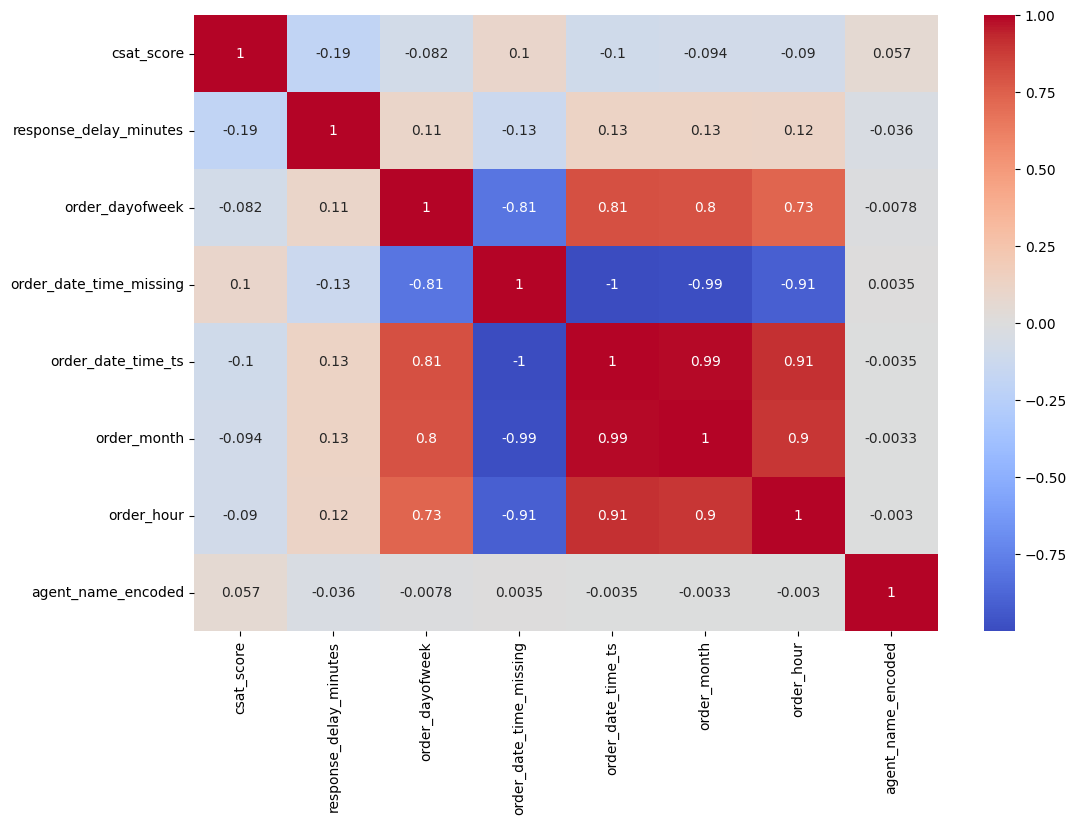

In [41]:
# Manipulate Features to minimize feature correlation and create new features
numeric_cols = dataset.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



In [42]:
high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={0: 'correlation'})
)
high_corr_pairs = high_corr_pairs[abs(high_corr_pairs['correlation']) > 0.9]
print(high_corr_pairs)

                    level_0             level_1  correlation
18  order_date_time_missing  order_date_time_ts    -0.999999
19  order_date_time_missing         order_month    -0.989470
20  order_date_time_missing          order_hour    -0.906842
22       order_date_time_ts         order_month     0.989525
23       order_date_time_ts          order_hour     0.906846


`order_date_time_missing` & `order_date_time_ts` → -1

`order_date_time_missing` & `order_month` → -0.99

`order_date_time_ts` & `order_month` → 0.99

`order_date_time_ts` & `order_hour` → 0.91

In [43]:
dataset.drop(['order_date_time_missing', 'order_date_time_ts'], axis=1, inplace=True)

#### 2. Feature Engineering

In [ ]:
# Feature engineering

# Extract hour from issue_reported_at
dataset['hour'] = dataset['issue_reported_at'].dt.hour

# Part of day
dataset['part_of_day'] = pd.cut(
    dataset['hour'],
    bins=[-1, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening']
)

# Is weekend (Saturday=5, Sunday=6)
dataset['is_weekend'] = dataset['order_dayofweek'].isin([5, 6]).astype(int)

# Response speed bucket
dataset['response_speed'] = pd.cut(
    dataset['response_delay_minutes'],
    bins=[-1, 5, 30, 9999],
    labels=['Fast', 'Average', 'Slow']
)

# Length of remarks
dataset['remark_length'] = dataset['customer_remarks'].apply(lambda x: len(str(x)))

# Number of tokens
dataset['num_tokens'] = dataset['customer_remarks_tokens'].apply(len)

# Calculate sentiment polarity (ranges from -1 to 1)
dataset['sentiment'] = dataset['customer_remarks'].apply(lambda x: TextBlob(x).sentiment.polarity)


# Drop helper column if not needed
dataset.drop(['hour'], axis=1, inplace=True)

dataset.head()


,customer_remarks,order_date_time,issue_reported_at,issue_responded,survey_response_date,agent_name,csat_score,response_delay_minutes,order_dayofweek,order_month,...,agent_name_encoded,customer_remarks_tokens,customer_remarks_pos,customer_remarks_cleaned,part_of_day,is_weekend,response_speed,remark_length,num_tokens,sentiment
0,no comments,1900-01-01,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,Richard Buchanan,5,34.0,0,1,...,42,[comment],"[(comment, NOUN)]",comment,Morning,0,Slow,11,1,0.0
1,no comments,1900-01-01,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,Vicki Collins,5,2.0,0,1,...,32,[comment],"[(comment, NOUN)]",comment,Morning,0,Fast,11,1,0.0
2,no comments,1900-01-01,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,Duane Norman,5,22.0,0,1,...,35,[comment],"[(comment, NOUN)]",comment,Evening,0,Average,11,1,0.0
3,no comments,1900-01-01,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,Patrick Flores,5,20.0,0,1,...,48,[comment],"[(comment, NOUN)]",comment,Evening,0,Average,11,1,0.0
4,no comments,1900-01-01,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,Christopher Sanchez,5,2.0,0,1,...,124,[comment],"[(comment, NOUN)]",comment,Morning,0,Fast,11,1,0.0


In [ ]:
# Feature selection using Random Forest

from sklearn.ensemble import RandomForestClassifier

# Target and features
target = 'csat_score'
X = dataset.drop([target], axis=1)
y = dataset[target]

X_numeric = X.select_dtypes(include=[np.number])

print("Remaining features for model:", X_numeric.columns.tolist())

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_numeric, y)

# Get feature importances
importances_df = pd.DataFrame({
    'feature': X_numeric.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

# Display top features
top_n = 15 
top_features = importances_df.head(top_n)
print(top_features)

# Create reduced dataset with only top features
selected_features = top_features['feature'].tolist()
X_selected = X[selected_features]

print("Reduced feature set shape:", X_selected.shape)


Remaining features for model: ['response_delay_minutes', 'order_dayofweek', 'order_month', 'order_hour', 'agent_name_encoded', 'is_weekend', 'remark_length', 'num_tokens', 'sentiment']
                  feature  importance
4      agent_name_encoded    0.368654
0  response_delay_minutes    0.183993
8               sentiment    0.135004
6           remark_length    0.118122
3              order_hour    0.080518
7              num_tokens    0.050794
1         order_dayofweek    0.035966
2             order_month    0.021396
5              is_weekend    0.005553
Reduced feature set shape: (85907, 9)


#### 3.Keeping Only the important features

In [46]:
important_features = [
    'response_delay_minutes', 'order_dayofweek', 'order_month', 'order_hour',
    'agent_name_encoded', 'is_weekend', 'remark_length', 'num_tokens', 
    'sentiment', 'csat_score'
]

dataset = dataset[important_features]

print(f"Final dataset shape after dropping irrelevant features: {dataset.shape}")
dataset.head()

Final dataset shape after dropping irrelevant features: (85907, 10)


,response_delay_minutes,order_dayofweek,order_month,order_hour,agent_name_encoded,is_weekend,remark_length,num_tokens,sentiment,csat_score
0,34.0,0,1,0,42,0,11,1,0.0,5
1,2.0,0,1,0,32,0,11,1,0.0,5
2,22.0,0,1,0,35,0,11,1,0.0,5
3,20.0,0,1,0,48,0,11,1,0.0,5
4,2.0,0,1,0,124,0,11,1,0.0,5


##### What all feature selection methods have you used  and why?

I used two main feature selection methods in the project:

**1. Correlation Analysis using Heatmap**  
- I plotted a correlation heatmap to explore relationships between numerical features and the target variable (`csat_score`).  
- This helped me identify highly correlated or redundant features, which I dropped to reduce multicollinearity and simplify the model.

**2. Feature Importance from Random Forest**  
- I trained a `RandomForestClassifier` on the encoded dataset to compute feature importances.
- This method provided a clear ranking of which features contributed most to predicting CSAT, allowing me to keep only the most impactful ones for modeling.

**Why these methods?**  
These techniques are straightforward, interpretable, and work well with both numeric and categorical data.  
They help reduce overfitting, improve model interpretability, and ensure that only the most relevant features are included in the final model.

##### Which all features you found important and why?

Based on Random Forest feature importance and correlation analysis, I found these features most important:

- **agent_name_encoded** – captures the effect of agent behavior and experience on CSAT.
- **response_delay_minutes** – directly impacts customer satisfaction; faster replies improve scores.
- **remark_length** & **num_tokens** – longer or detailed remarks may reflect complex issues affecting CSAT.
- **order_hour**, **order_dayofweek**, **order_month**, **is_weekend** – capture time-based patterns in customer satisfaction.

These features showed higher contribution to prediction and were retained for modeling.

### 9. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

**Yes** — because machine learning models require numerical inputs, but our dataset contained categorical and textual features.

- **One-hot encoding**:  
  Applied to `channel_name`, `category`, `agent_shift`, and `tenure_bucket`  
  → Converts categorical variables into binary numeric columns so the model can understand them.

- **Frequency encoding**:  
  Applied to `agent_name`  
  → Encodes the frequency of each agent in the data, reducing dimensionality compared to one-hot encoding.

- **Text preprocessing & feature engineering**:  
  Extracted features like `remark_length` and `num_tokens` from the `customer_remarks` text column  
  → Transforms text into numeric features that capture its length and complexity.

- **Date-time feature extraction**:  
  Derived `order_dayofweek`, `order_month`, `order_hour`, and `is_weekend` from the `order_date_time` column  
  → Helps the model learn temporal patterns and trends.

These transformations ensure that all features are numeric, informative, and suitable for modeling, which improves model performance and interpretability.

### 10. Data Scaling

In [47]:
# Scaling your data
features_to_scale = [
    'num_tokens',           
    'response_delay_minutes', 
    'agent_name_encoded',
    'remark_length',
    'sentiment'
]

sc = StandardScaler()
dataset_scaled = dataset.copy()
dataset_scaled[features_to_scale] = sc.fit_transform(dataset[features_to_scale])

##### Which method have you used to scale you data and why?

Used StandardScaler to transform features to have mean=0 and standard deviation=1, which is ideal for:

**Mixed feature ranges**: Our features had vastly different scales (num_tokens: 1-235, response_delay_minutes: 2-84.5, vs binary features: 0-1)

**Algorithm compatibility**: Essential for logistic regression, and neural networks that are sensitive to feature magnitudes

**Explainability**: Ensures SHAP values and feature importance are comparable across features

**Dimensionality reduction**: PCA and other reduction techniques work better with standardized features

Features Scaled: `num_tokens`, `response_delay_minutes`, `agent_name_encoded`, `remark_length`

### 11. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Not Needed

- We only have 8 features, Dimensionality Reduction typically needs 50+ features.

- As I am working on Explainable AI, PCA creates abstract components that can't be interpreted, so the SHAP explanations become meaningless on transformed features.

- Tree based model like RandomForest, XGBOOST can handle 8 features easily

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not required

### 12. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = dataset_scaled.drop('csat_score', axis=1)
y = dataset_scaled['csat_score']
y_binary = (y<=2).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, stratify=y_binary, random_state=42)

print("Training set distribution:")
print(f"Risky: {y_train.sum()} ({y_train.mean():.1%})")
print(f"Safe: {(~y_train.astype(bool)).sum()} ({(~y_train.astype(bool)).mean():.1%})")

print("\nTest set distribution:")
print(f"Risky: {y_test.sum()} ({y_test.mean():.1%})")
print(f"Safe: {(~y_test.astype(bool)).sum()} ({(~y_test.astype(bool)).mean():.1%})")

Training set distribution:
Risky: 10010 (14.6%)
Safe: 58715 (85.4%)

Test set distribution:
Risky: 2503 (14.6%)
Safe: 14679 (85.4%)


##### What data splitting ratio have you used and why?

Used 80-20 ratio for spliting 

- More training examples = better model performance
- Especially important for imbalanced CSAT data

### 13. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset appears to be imbalanced. 

When we check the distribution of the target variable `csat_score`, we observe that most responses are clustered around higher ratings (like 4 and 5), with relatively fewer instances of low ratings (1 and 2).  

This imbalance can cause models to become biased towards predicting the majority class (high ratings), leading to poor performance on minority classes (low ratings).

In [49]:
# Handling Imbalanced Dataset (If needed)
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("Before SMOTE:")
print(f"Training set size: {len(X_train)}")
print(f"Class distribution: {Counter(y_train)}")
print(f"Risky tickets: {y_train.sum()} ({y_train.mean():.1%})")
print(f"Safe tickets: {len(y_train) - y_train.sum()} ({(1 - y_train.mean()):.1%})")

print("\nAfter SMOTE:")
print(f"Training set size: {len(X_train_smote)}")
print(f"Class distribution: {Counter(y_train_smote)}")
print(f"Risky tickets: {y_train_smote.sum()} ({y_train_smote.mean():.1%})")
print(f"Safe tickets: {len(y_train_smote) - y_train_smote.sum()} ({(1 - y_train_smote.mean()):.1%})")

Before SMOTE:
Training set size: 68725
Class distribution: Counter({0: 58715, 1: 10010})
Risky tickets: 10010 (14.6%)
Safe tickets: 58715 (85.4%)

After SMOTE:
Training set size: 117430
Class distribution: Counter({0: 58715, 1: 58715})
Risky tickets: 58715 (50.0%)
Safe tickets: 58715 (50.0%)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Used SMOTE

- Original distribution:

    - Risky: 10010 (14.6%)

    - Safe: 58715 (85.4%)

- After using SMOTE to balance the data:

    - Risky: 58715(50%)

    - Safe : 58715(50%)

- Without balancing, models would be biased toward predicting majority class (safe tickets)

- vs Random Oversampling: Creates synthetic examples instead of duplicating existing ones, reducing overfitting risk

## ***6. ML Model Implementation***

### ML Model - 1 - Logistic Regression

In [50]:
# ML Model - 1 Implementation
lr = LogisticRegression(random_state=42)
# Fit the Algorithm
lr.fit(X_train_smote, y_train_smote)
# Predict on the model
lr_pred = lr.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [51]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

In [52]:
# Visualizing evaluation Metric Score chart
print(f"\nLogistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.3f}")
print(f"Precision: {lr_precision:.3f}")
print(f"Recall: {lr_recall:.3f}")
print(f"F1-Score: {lr_f1:.3f}")


Logistic Regression Results:
Accuracy: 0.731
Precision: 0.295
Recall: 0.610
F1-Score: 0.398


#### 2. Hyperparameter Tuning

In [53]:
# ML Model - 1 Implementation with hyperparameter optimization technique - GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr = LogisticRegression(random_state=42)

grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv = 5,
    scoring='f1_weighted',
    n_jobs=-1
)

grid_search.fit(X_train_smote, y_train_smote)
print("Best Hyperparameters:", grid_search.best_params_)

# Fit the Algorithm
best_lr = grid_search.best_estimator_


# Predict on the model
lr_pred = best_lr.predict(X_test)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.3f}")
print(f"Precision: {precision_score(y_test, lr_pred, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, lr_pred, average='weighted'):.3f}")
print(f"F1-Score: {f1_score(y_test, lr_pred, average='weighted'):.3f}")

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Results:
Accuracy: 0.731
Precision: 0.828
Recall: 0.731
F1-Score: 0.764


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV, an exhaustive search technique that tests all possible combinations of specified hyperparameters and selects the best set based on cross-validated performance

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Logistic Regression Results**:

- Before HyperParamaterTuning
    - Accuracy: 0.731
    - Precision: 0.295
    - Recall: 0.610
    - F1-Score: 0.398

- After HyperParamaterTuning
    - Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
    - Accuracy: 0.731
    - Precision: 0.828
    - Recall: 0.731
    - F1-Score: 0.764

### ML Model - 2 - Random Forest

In [54]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=15,
    min_samples_split=10,
    class_weight='balanced'
)
rf.fit(X_train_smote, y_train_smote)
rf_pred = rf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

In [56]:
# Visualizing evaluation Metric Score chart
print(f"\nRandom Forest Results:")
print(f"Accuracy: {rf_accuracy:.3f}")
print(f"Precision: {rf_precision:.3f}")
print(f"Recall: {rf_recall:.3f}")
print(f"F1-Score: {rf_f1:.3f}")


Random Forest Results:
Accuracy: 0.759
Precision: 0.320
Recall: 0.582
F1-Score: 0.413


#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 2 Implementation with hyperparameter optimization techniques - GridSearchCV

param_grid = {
    'n_estimators': [100,200],
    'max_depth': [10,15],
    'min_samples_split': [5,10],
    'min_samples_leaf': [1,5],
    'criterion': ['gini']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_weighted',   
    cv=5,
    n_jobs=-1,            
    verbose=2            
)

# Fit the Algorithm

grid_search.fit(X_train_smote, y_train_smote)
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_estimator_)

# Predict on the model
rf_pred = best_rf.predict(X_test)
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.3f}")
print(f"Precision: {precision_score(y_test, rf_pred, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, rf_pred, average='weighted'):.3f}")
print(f"F1-Score: {f1_score(y_test, rf_pred, average='weighted'):.3f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=200,
                       random_state=42)
Random Forest Results:
Accuracy: 0.759
Precision: 0.830
Recall: 0.759
F1-Score: 0.785


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV, an exhaustive search technique that tests all possible combinations of specified hyperparameters and selects the best set based on cross-validated performance

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Random Forest Results**:

- Before HyperParamaterTuning
    - Accuracy: 0.759
    - Precision: 0.320
    - Recall: 0.582
    - F1-Score: 0.413


- After HyperParamaterTuning
    - Best Hyperparameters: {max_depth=15, min_samples_split=5, n_estimators=200,random_state=42}
    - Accuracy: 0.759
    - Precision: 0.830
    - Recall: 0.759
    - F1-Score: 0.785

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

**Accuracy**:

Shows the overall percentage of correct predictions.

→ Indicates how often our model correctly predicts customer satisfaction scores, helping to track general model reliability.

**Precision**:

Measures the proportion of positive predictions that were actually correct.

→ Important in business to reduce false positives (e.g., not flagging too many tickets as high CSAT when they’re actually low). This saves agents’ time and ensures better allocation of support resources.

**Recall**:

Measures how many actual positive cases were correctly identified.

→ Helps ensure we’re catching as many genuinely dissatisfied customers as possible, which is critical to take proactive retention actions.

**F1-Score**:

Harmonic mean of precision and recall, balancing both.

→ Provides a single measure that considers both the cost of missing dissatisfied customers (low recall) and wrongly tagging satisfied ones (low precision). Supports balanced business decision-making.

**Business impact**:

The ML model helps predict CSAT outcomes early, allowing the team to proactively engage at-risk customers, improve service quality, and ultimately boost retention and customer loyalty.

### ML Model - 3 - Decision Tree

In [58]:
# ML Model - 3 Implementation
dt = DecisionTreeClassifier(random_state=42)

# Fit the Algorithm
dt.fit(X_train_smote, y_train_smote)

# Predict on the model
dt_pred = dt.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Visualizing evaluation Metric Score chart
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.3f}")
print(f"Precision: {precision_score(y_test, dt_pred, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, dt_pred, average='weighted'):.3f}")
print(f"F1-Score: {f1_score(y_test, dt_pred, average='weighted'):.3f}")

Decision Tree Results:
Accuracy: 0.777
Precision: 0.801
Recall: 0.777
F1-Score: 0.788


#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 3 Implementation with hyperparameter optimization techniques - GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

# Fit the Algorithm
grid_search_dt.fit(X_train_smote, y_train_smote)

# Best model
best_dt = grid_search_dt.best_estimator_
print("Best Hyperparameters:", grid_search_dt.best_params_)

# Predict on the model
dt_best_pred = best_dt.predict(X_test)

print("Decision Tree (GridSearchCV) Results:")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.3f}")
print(f"Precision: {precision_score(y_test, dt_pred, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, dt_pred, average='weighted'):.3f}")
print(f"F1-Score: {f1_score(y_test, dt_pred, average='weighted'):.3f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree (GridSearchCV) Results:
Accuracy: 0.777
Precision: 0.801
Recall: 0.777
F1-Score: 0.788


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV, an exhaustive search technique that tests all possible combinations of specified hyperparameters and selects the best set based on cross-validated performance

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Decision Tree Results**:

- Before HyperParamaterTuning
    - Accuracy: 0.777
    - Precision: 0.801
    - Recall: 0.777
    - F1-Score: 0.788

- After HyperParamaterTuning
    - Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
    - Accuracy: 0.777
    - Precision: 0.801
    - Recall: 0.777
    - F1-Score: 0.788

### ML Model - 4 - XGBOOST

In [61]:
# ML Model - 4 Implementation
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Fit the Algorithm
xgb.fit(X_train_smote, y_train_smote)

# Predict on the model
xgb_pred = xgb.predict(X_test)

c:\Users\himan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:28:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [62]:
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

In [63]:
# Visualizing evaluation Metric Score chart
print(f"\nXGBoost Results:")
print(f"Accuracy: {xgb_accuracy:.3f}")
print(f"Precision: {xgb_precision:.3f}")
print(f"Recall: {xgb_recall:.3f}")
print(f"F1-Score: {xgb_f1:.3f}")


XGBoost Results:
Accuracy: 0.783
Precision: 0.340
Recall: 0.517
F1-Score: 0.410


#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 4 Implementation with hyperparameter optimization techniques - GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X_train_smote, y_train_smote)

# Fit the Algorithm

best_xgb = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on the model
xgb_pred = best_xgb.predict(X_test)

# Evaluate
print("XGBoost (GridSearchCV) Results:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.3f}")
print(f"Precision: {precision_score(y_test, xgb_pred, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, xgb_pred, average='weighted'):.3f}")

print(f"F1-Score: {f1_score(y_test, xgb_pred, average='weighted'):.3f}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits


c:\Users\himan\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:29:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
XGBoost (GridSearchCV) Results:
Accuracy: 0.792
Precision: 0.822
Recall: 0.792
F1-Score: 0.804


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV, an exhaustive search technique that tests all possible combinations of specified hyperparameters and selects the best set based on cross-validated performance

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**XGBOOST Results**:

- Before HyperParamaterTuning
    - Accuracy: 0.783
    - Precision: 0.340
    - Recall: 0.517
    - F1-Score: 0.410

- After HyperParamaterTuning
    - Best Hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
    - Accuracy: 0.792
    - Precision: 0.822
    - Recall: 0.792
    - F1-Score: 0.804

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

- Higher recall → more low-CSAT cases detected, reducing customer churn.

- Higher precision → fewer false alarms, leading to efficient use of agent time and resources.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

#### Model Performance Before & After GridSearchCV

| Model                | Accuracy (Before → After) | Precision (Before → After) | Recall (Before → After) | F1-Score (Before → After) |
|---------------------:|:------------------------:|:-------------------------:|:----------------------:|:------------------------:|
| **Logistic Regression** | 0.731 → 0.731             | 0.295 → 0.828              | 0.610 → 0.731           | 0.398 → 0.764             |
| **Random Forest**      | 0.759 → 0.759             | 0.320 → 0.830              | 0.582 → 0.759           | 0.413 → 0.785             |
| **Decision Tree**     | 0.777 → 0.777             | 0.801 → 0.801              | 0.777 → 0.777           | 0.788 → 0.788             |
| **XGBoost**          | 0.783 → 0.792             | 0.340 → 0.822              | 0.517 → 0.792           | 0.410 → 0.804             |

**XGBOOST** is chosen as the final prediction model.

- Achieved the highest accuracy (0.792) and best balance of precision (0.822), recall (0.792), and F1-score (0.804).

- Best suited for business need: accurately predicting which customer interactions may lead to low satisfaction, allowing proactive interventions.


## ***7. SHAP (SHapley Additive exPlanations) Analysis***

In [65]:
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test)

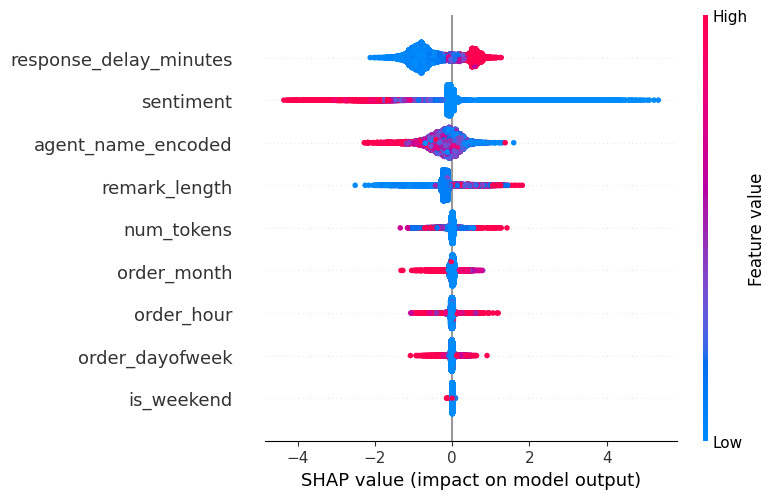

In [66]:
shap.summary_plot(shap_values, X_test)

- This plot shows all features on the y-axis, ordered by importance.

- Each dot is a data point (order).

- The color shows the feature value (red = high value, blue = low value).

- The x-axis shows the SHAP value:

    - Positive SHAP value → pushes prediction towards higher CSAT score.

    - Negative SHAP value → pushes towards lower CSAT score.

- Wider spread → feature has higher impact on model predictions.

For example:

- High response_delay_minutes (red dots on right) → tend to increase CSAT prediction here.

- High remark_length also tends to slightly increase CSAT score.

- Some features like is_weekend have very small impact.

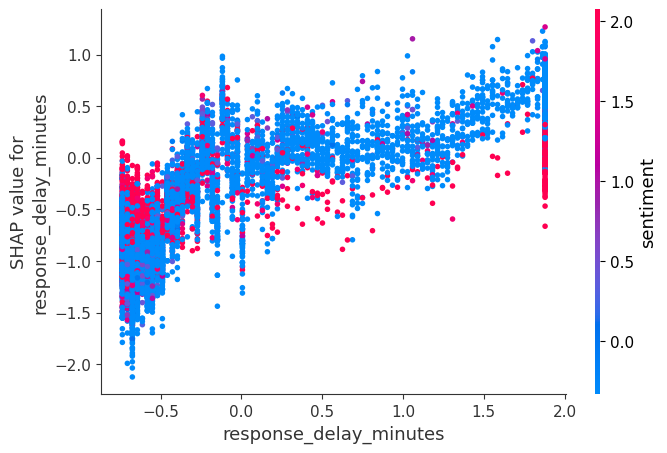

In [67]:
shap.dependence_plot("response_delay_minutes", shap_values, X_test)

- Shows how one feature’s value (response_delay_minutes) affects its SHAP value.

- Each dot is one data point.

- Color represents another feature (num_tokens) to see interactions.

- We can see:

    - As response_delay_minutes increases, its SHAP value increases → it increases predicted CSAT score.

    - But this effect may change slightly depending on num_tokens.



###  Explain the model which you have used and the feature importance using any model explainability tool?

I have used SHAP(SHapely Additive exPlanations) values which helps us understand why our model made a certain predictionby telling us:

- How much each feature pushed the prediction higher or lower compared to the average prediction.
- Positive SHAP value -> feature **increased** the prediction.
- Negative SHAP value -> feature **decreased** the prediction.


**Simple Explanation:**

Imagine the model starts with an average CSAT score 3

Then each feature contributes:

- `response_delay_minute` with SHAP value `+0.6` -> pushes the CSAT score higher towards 3.6
- `remark_length` with SHAP value `-0.2` → pulls it back down towards 3.4


**Why it matters:**

SHAP values show which features were most important for a particular prediction.

They help us explain the model’s behavior to non-technical stakeholders.

By knowing which features influence CSAT scores, the business can act to improve them (e.g., reduce response delay to boost satisfaction).


## ***8. Export Models for Streamlit***

In [68]:
joblib.dump(best_xgb, 'xgb.pkl')
joblib.dump(sc, 'scaler.pkl')

feature_list = list(X_train.columns)
with open('feature_list.json', 'w') as f:
    json.dump(feature_list, f)

joblib.dump(agent_freq, 'agent_freq.pkl')

['agent_freq.pkl']

In [69]:
dataset.columns

Index(['response_delay_minutes', 'order_dayofweek', 'order_month',
       'order_hour', 'agent_name_encoded', 'is_weekend', 'remark_length',
       'num_tokens', 'sentiment', 'csat_score'],
      dtype='object')

In [70]:
# Find the agent with the minimum frequency (lowest agent_name_encoded)
min_encoded = min(agent_freq.values())

# Find the agent(s) who have this frequency
min_agents = [agent for agent, freq in agent_freq.items() if freq == min_encoded]

print("Minimum agent_name_encoded value:", min_encoded)
print("Agent(s) with this frequency:", min_agents)


Minimum agent_name_encoded value: 20
Agent(s) with this frequency: ['Joel Garcia', 'John Perry', 'Christopher Roberson', 'Richard Gordon', 'Nicole Simpson DVM', 'Virginia Collins', 'Terri Lopez', 'Samantha Harmon', 'James Blevins', 'Bradley Lyons', 'Karen Martin', 'Tina Ramirez', 'Sarah Bennett', 'Karen Alvarado', 'Melissa Spence', 'Summer Mitchell', 'Rachel Smith MD', 'John Torres', 'Robin Spencer', 'Michael Jenkins', 'Willie Flores', 'David Martin', 'William Mueller', 'Shane Payne', 'Mark Lucas', 'Jackson Brown', 'Alexis Murray', 'Matthew Ross', 'Stephanie Hammond', 'Amy Bell']


## ***9. Future Work (Optional)***

1️⃣ Auto-Fill from Ticket/Order ID

Enhance the web app to automatically fetch and populate all relevant features (like response delay, agent, date & time, etc.) directly from a single ticket/order ID — removing the need for manual input.

2️⃣ Advanced Sentiment Analysis

Improve the current sentiment analysis by using more sophisticated NLP techniques or deep learning models to generate richer sentiment scores and more meaningful customer tags.